## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn**

In [4]:
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

boston_dataset = load_boston()

**Boston_dataset is a dictionary. let's check what it contains**


In [5]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

**Load the data into pandas dataframe**

In [6]:
df=pd.DataFrame(boston_dataset["data"],columns=boston_dataset["feature_names"])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

In [7]:
df["MEDV"]=boston_dataset["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**Data preprocessing**

Check for missing values in all the columns

In [8]:
df2=df.copy()
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Data Visualization**

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

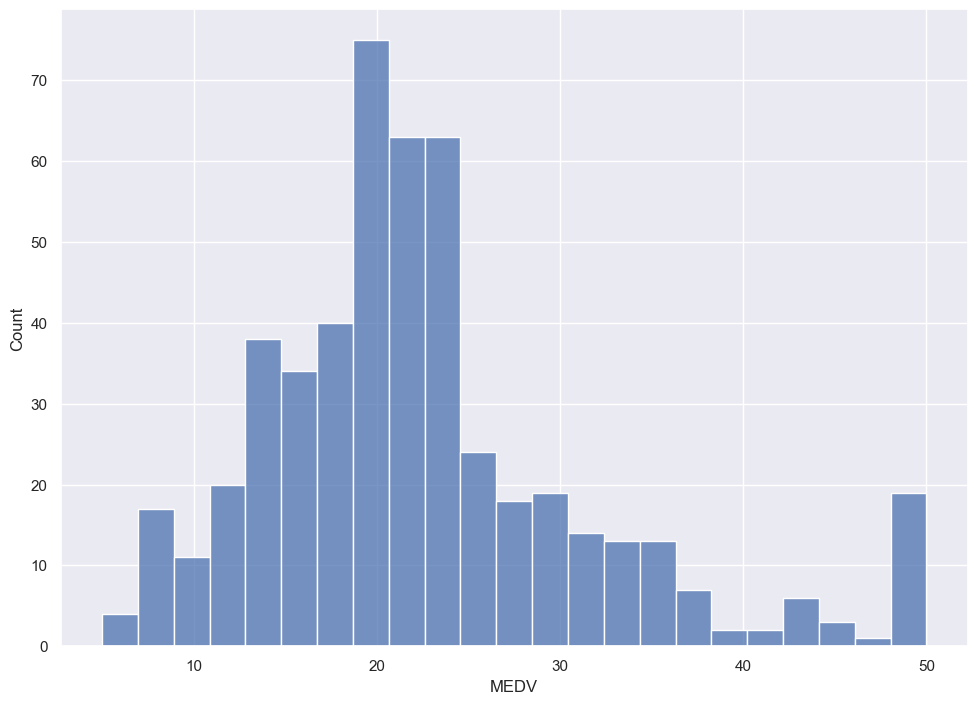

In [12]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.histplot(df2["MEDV"])

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap


*   From coorelation plot: which are the columns that are more highli correlated with **MEDV**

* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity


In [13]:
df2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

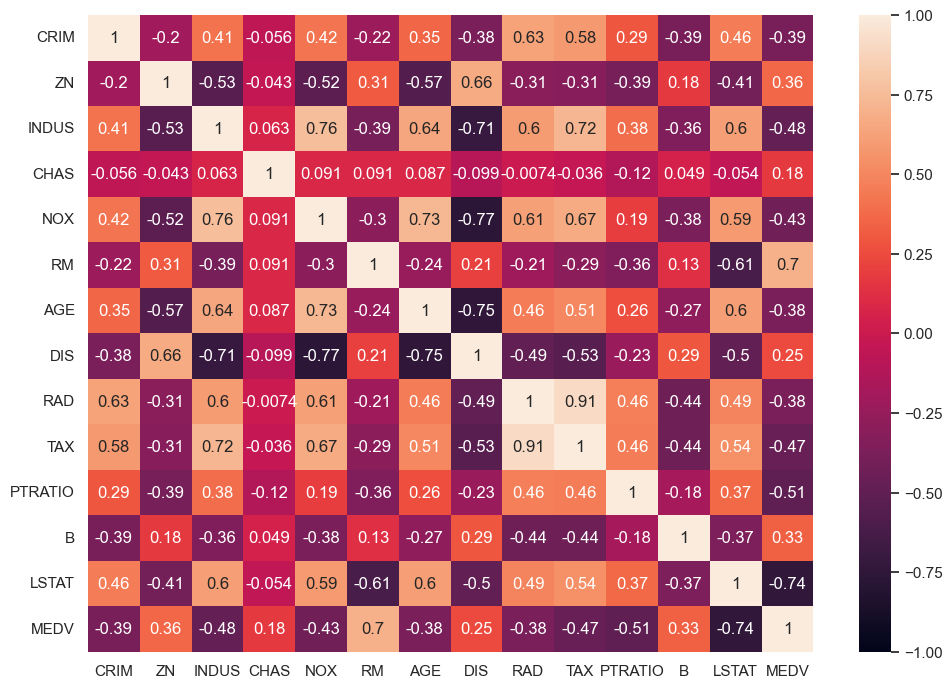

In [14]:
sns.heatmap(df2.corr(),annot=True,vmin=-1,vmax=1)

La más correlacionada con MEDV(Target) es RM. 

Muy correlacionadas entre ellas RAD con TAX. 

In [15]:
df2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

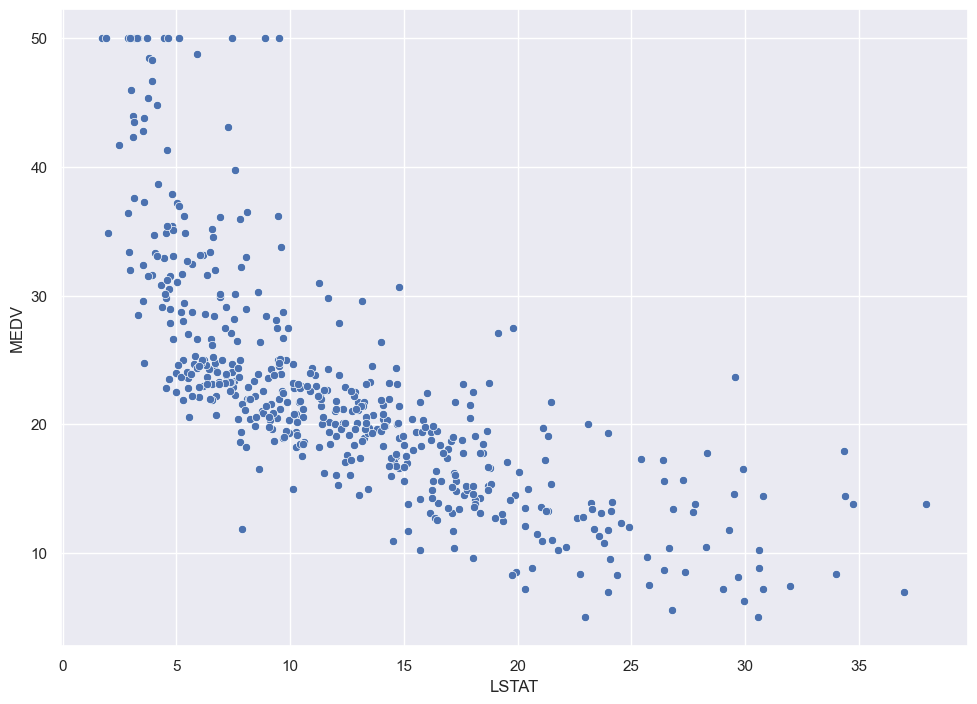

In [18]:
sns.scatterplot(x=df2["LSTAT"],y=df2["MEDV"])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

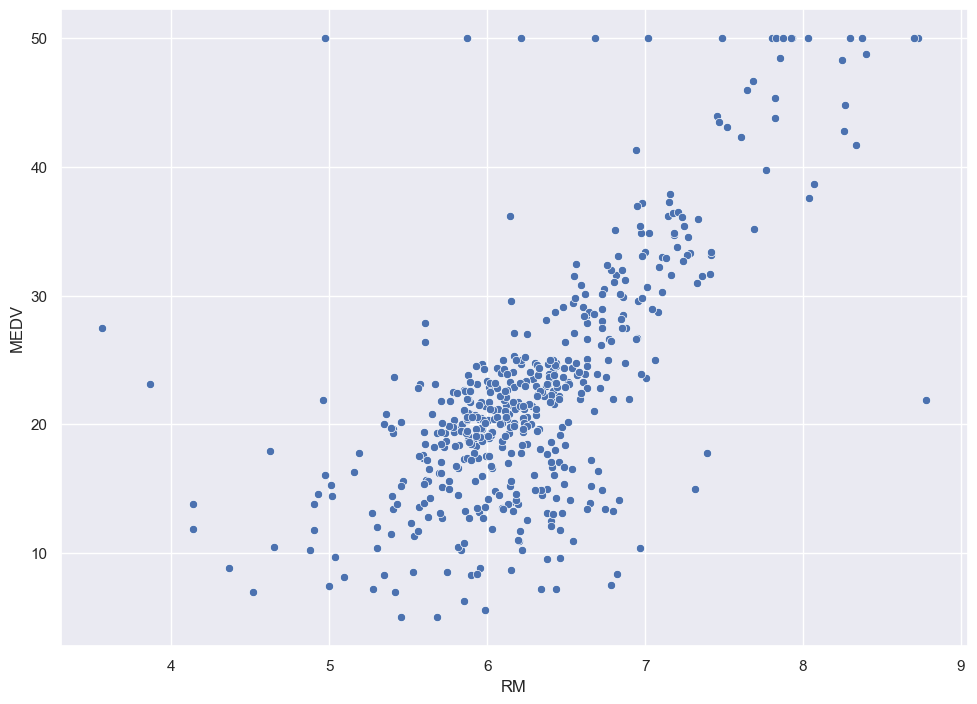

In [19]:
sns.scatterplot(x=df2["RM"],y=df2["MEDV"])

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [20]:
X=df2[["RM","LSTAT"]]

In [21]:
y=df2["MEDV"]

In [23]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (404, 2)	y_train: (404,)
X_test: (102, 2)	y_test: (102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [26]:
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
y_hat=lm.predict(X_test)
y_hat

array([26.28587773, 24.25377886, 24.42060228, 13.11754087, 22.49511785,
       22.99636043, 21.40735689, 23.1439176 , 15.86631602, 24.49894913,
       15.66714802, 18.85052667, 19.48253539,  3.98290593, 37.34092175,
       31.60596506, 23.5941266 , 33.2950621 , 28.69055638, 22.88162089,
       26.85271393, 20.89975988, 20.81250528, 27.14537125, 21.08017113,
        9.74333537, 20.15512287, 17.56350171, 37.2052103 , 18.6688415 ,
       18.528333  , 20.17796936, 23.8988013 , 21.75587854, 25.59651746,
       18.79694526, 11.792485  , 22.93730323, 19.61654119, 14.43528526,
       24.42127312, 19.031016  , 24.1741034 , 14.58361474, 26.48547198,
       25.55656793, 17.94458882, 20.14812616,  4.60378383, 26.93655721,
       20.33112961, 16.17879073, 21.66465634, 38.61474899, 16.81321483,
       18.53552994, 19.74880245, 20.57255588, 21.52884614, 17.87655368,
       23.69717903, 21.63170868, 31.22593617, 29.7494804 , 18.25853524,
       29.24595764, 21.12607982, 17.92429807, 20.78992128, 21.71

In [34]:
y_t=lm.predict(X_train)
y_t

array([27.8910534 , 22.72173433, 26.52139922, 21.3121774 ,  8.38813459,
       14.92449498, 24.05803525, 26.24246493, 31.20351867, 10.14446072,
       17.72837247, 18.67135836,  7.90401844, 20.11731315,  6.77843469,
       24.00942496,  7.64765508, 37.14698253, 30.09577382, 10.85398686,
       16.74830238, 21.02701597, 22.71898869, 17.25968501, 32.40924059,
       15.28344532, 22.9802922 , 31.90263161, 20.58552998, 16.49604424,
       17.47010322, 19.30233743, 18.70821894, 32.62280488, 22.70541909,
        8.77604158, 28.76372914, 12.58295535, 15.81759119, 20.11305691,
       31.09782725, 28.54448643, 26.34610495, 18.73669465, 32.27615264,
       31.76110653, 16.28343426,  5.51905327, 29.66267302, 28.1764983 ,
        1.84309796, 27.07780673, 19.99548848, 27.89941519, 17.44939655,
       17.85672839, 18.74432058, 13.42795901, 12.84506491, 23.16257803,
       31.33124538, 33.16740557, 29.75995587, 21.43913969, 24.55824817,
       27.82566516, 26.32324022, 18.10614457, 29.60908371,  9.52

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

mae_test = mean_absolute_error(y_test, y_hat)
mape_test = mean_absolute_percentage_error(y_test, y_hat)
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat))
r2_test = r2_score(y_test, y_hat)

print("MAE_test:", mae_test)
print("MAPE_test:", mape_test)
print("RMSE_test:", rmse_test)
print("R2_test:", r2_test)

MAE_test: 4.142444656238561
MAPE_test: 0.21654045363343535
RMSE_test: 6.114172522817781
R2_test: 0.5409084827186418


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

mae_train = mean_absolute_error(y_train, y_t)
mape_train = mean_absolute_percentage_error(y_train, y_t)
rmse_train = np.sqrt(mean_squared_error(y_train, y_t))
r2_train = r2_score(y_train, y_t)

print("MAE_train:", mae_train)
print("MAPE_train:", mape_train)
print("RMSE_train:", rmse_train)
print("R2_train:", r2_train)

MAE_train: 3.911260637542154
MAPE_train: 0.20593024117474165
RMSE_train: 5.365657134224422
R2_train: 0.6618625964841893


**Evaluate the model performance in the training and testing sets**

In [44]:
# model evaluation for training set


print("The model performance for training set")
print("--------------------------------------")
print("RMSE_train:", rmse_train)
print("R2_train:", r2_train)
print("\n")

# model evaluation for testing set


print("The model performance for testing set")
print("--------------------------------------")
print("RMSE_test:", rmse_test)
print("R2_test:", r2_test)

The model performance for training set
--------------------------------------
RMSE_train: 5.365657134224422
R2_train: 0.6618625964841893


The model performance for testing set
--------------------------------------
RMSE_test: 6.114172522817781
R2_test: 0.5409084827186418


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

<AxesSubplot:ylabel='MEDV'>

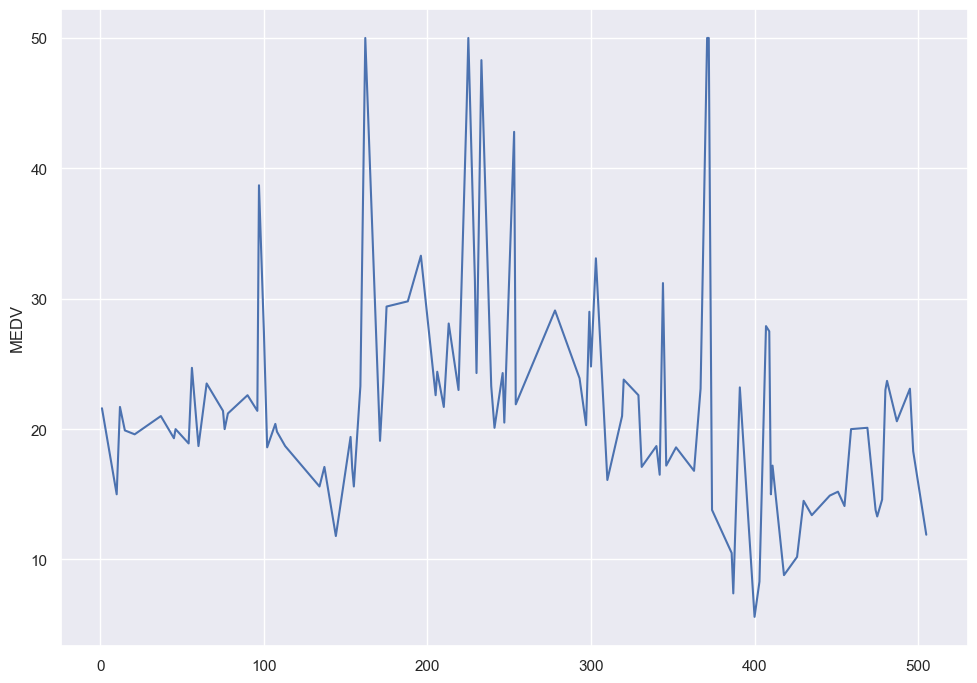

In [46]:
sns.lineplot(y_test)

<AxesSubplot:>

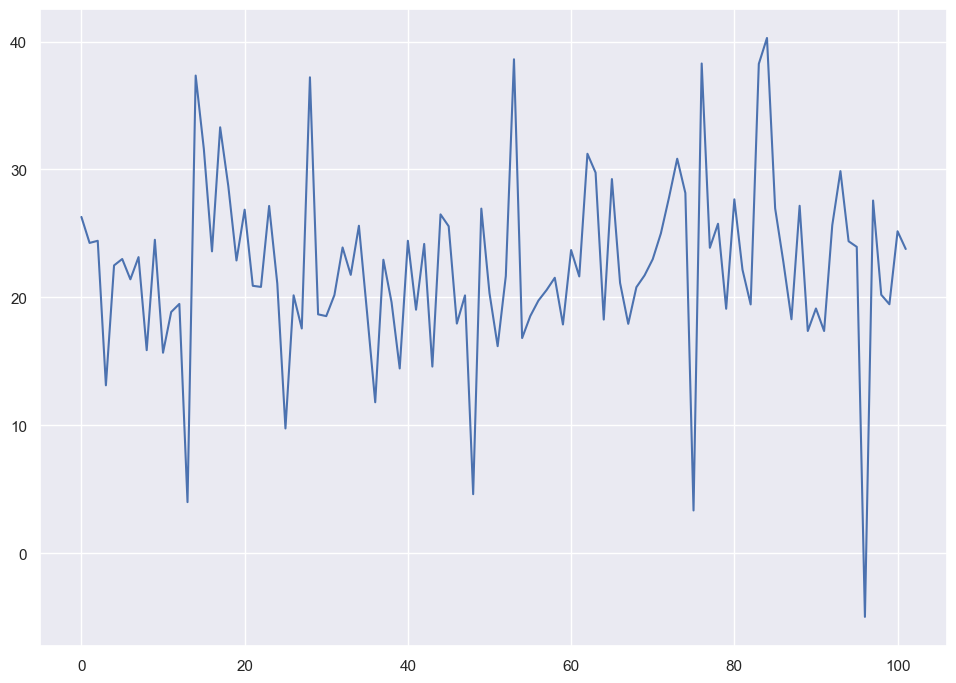

In [47]:
sns.lineplot(y_hat)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
poly = PolynomialFeatures(2, include_bias=False)
lm = LinearRegression()

## Entrenando el modelo

In [84]:
X_train_t = poly.fit_transform(X_train)
lm.fit(X_train_t, y_train)

LinearRegression()

In [85]:
y_hat = lm.predict(poly.transform(X_test))

## Error en el conjunto de entrenamiento

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

mae_train = mean_absolute_error(y_train, lm.predict(X_train_t))
mape_train = mean_absolute_percentage_error(y_train,lm.predict(X_train_t))
rmse_train = np.sqrt(mean_squared_error(y_train,lm.predict(X_train_t)))
r2_train = r2_score(y_train,lm.predict(X_train_t))

print("MAE_train:", mae_train)
print("MAPE_train:", mape_train)
print("RMSE_train:", rmse_train)
print("R2_train:", r2_train)

MAE_train: 3.0801913022545198
MAPE_train: 0.1601963141219315
RMSE_train: 4.319658995006362
R2_train: 0.780847562402052


## Error con los datos de test

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

mae_test = mean_absolute_error(y_test, y_hat)
mape_test = mean_absolute_percentage_error(y_test, y_hat)
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat))
r2_test = r2_score(y_test, y_hat)

print("MAE_test:", mae_test)
print("MAPE_test:", mape_test)
print("RMSE_test:", rmse_test)
print("R2_test:", r2_test)

MAE_test: 3.3415182491807753
MAPE_test: 0.1707531872893932
RMSE_test: 5.3051834900523325
R2_test: 0.6543594328054239


In [90]:
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.319658995006362
R2 score of training set is 0.780847562402052


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.3051834900523325
R2 score of test set is 0.6543594328054239


**Did the model improve using the polynomila model?**

Si. RMSE en polinómico es más pequeño que en lineal y R2 en polinómico está más próximo a 1